Menghitung Deteksi Rambutan Dengan Template Matching

In [1]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2
import numpy as np

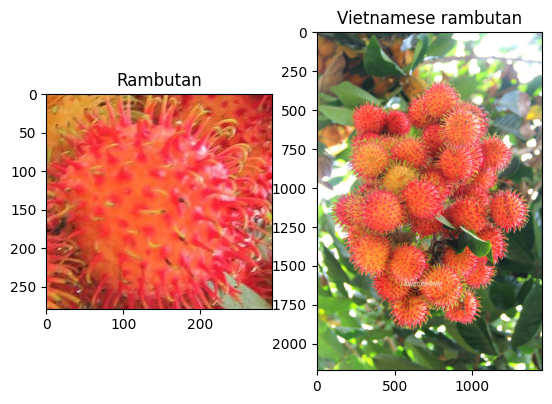

In [4]:
# panggil dan konversi warna agar sesuai dengan Matplotlib
sawit = cv2.imread('Crop Vietnamese rambutan.jpg')
sawit = cv2.cvtColor(sawit, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_sawit = cv2.imread('Vietnamese rambutan.jpg')
kebun_sawit = cv2.cvtColor(kebun_sawit, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(sawit), plt.title('Rambutan')
plt.subplot(122),plt.imshow(kebun_sawit), plt.title('Vietnamese rambutan')
plt.show()

In [5]:
# membaca gambar utuh untuk dicari
img_rgb = cv2.imread('Vietnamese rambutan.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# membaca template
template = cv2.imread('Crop Vietnamese rambutan.jpg',0)

# ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

# membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0 # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    # jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9),1):
            # tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9),1):
            # tambahkan koordinat y ke list
            lspoint2.append(k)
        count+=1 # berapa jumlah matching yang ditemukan?
    else:
        continue
print ("Jumlah objek ditemukan ", count)
# tampilkan dengan imshow
cv2.imshow("Detected Objects", img_rgb)
cv2.waitKey(0)

Jumlah objek ditemukan  107


-1